Detekce anomálií v EKG signálech
V EKG siglálu zaznamenáváme: 
    - P vlnu - která nastává před Q kmitem nebo R vrcholem, normální amplituda P vlny nepřesahuje 0,25 mV
    - Q kmit, První negativní kmit, který může se v komplexu nemusí vyskytovat, vyskytuje se před R vrcholem, trvání nepřesahuje 0.03s, kmit delší než 0,04s jasně poukazuje na jizvu po infarktu myokardu
    - PQ interval - od začátku P vlny do začátku komorového komplexu QRS - Fyziologické hodnoty se pohybují mezi 0,12–0,20 s.
        - Prodloužený P-Q interval znamená delší dobu převodu řídícího impulsu ze síní na komory při poruchách v A-V části převodního systému. Zkrácený PQ interval znamená, že řídící impuls se dostal na převodní systém komor dříve než normálně  protože zpravidla obešel A-V uzel abnormálními spoji převodního systému.
    - PQ úsek - doba mezi koncem P a začátkem Q
    - R vrchol - pozitivní kmit
    - S kmit - jsou negativní kmity komplexu následující za R vrcholem
    - QRS komplex - depolarizace komor(Fyziologicky QRS komplex trvá do 0,11 s.), pro výpočet se mohou použít Sokolowovy indexy
    - T vlna - 
    - QT interval - od začátku QRS komplexu po konec vlny T. Normální hodnoty jsou od 0,25 s do 0,50 s.
    - ST úsek - doba mezi koncem S a začátkem T, Odchylky od normy jsou známkou poruchy repolarizace myokardu. Typické změny ST úseku se objevují v akutní fázi transmurálního infarktu myokardu.

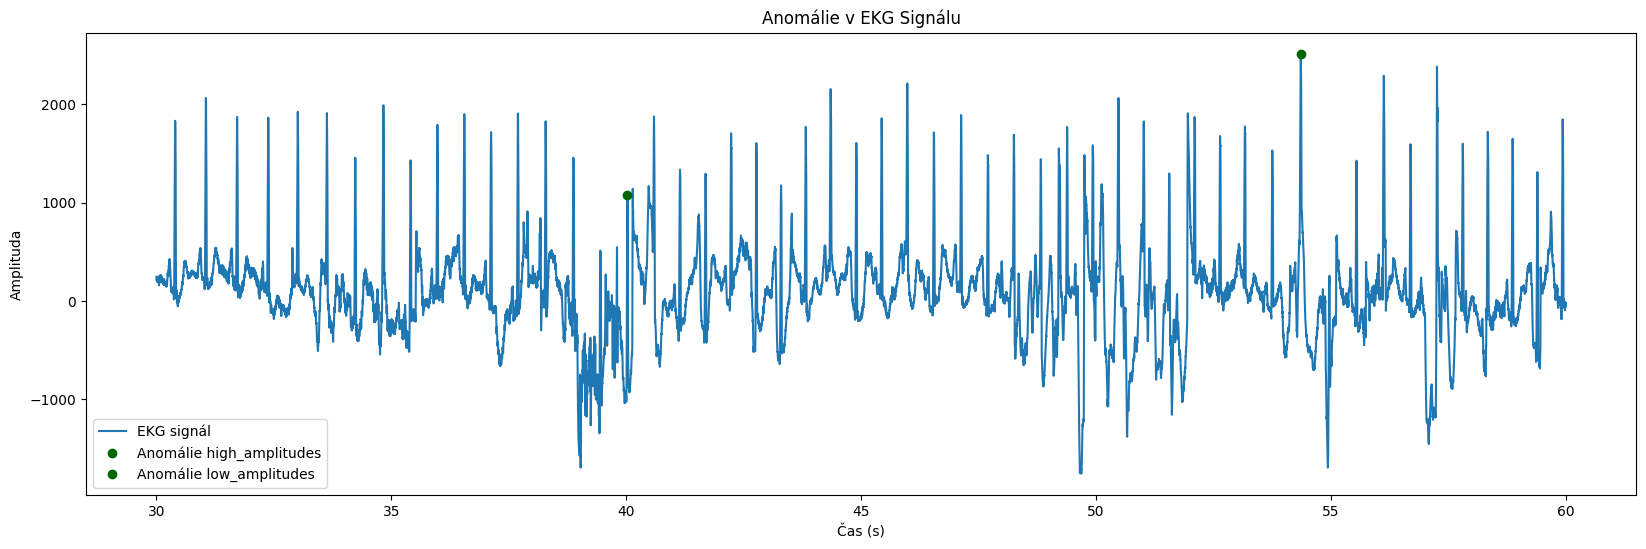

[array([  1.92542199,  -3.20903665,  -5.77626596,  -3.85084398,
        -5.77626596,  -7.05988062,  -3.20903665,   8.98530261,
        14.76156858,  17.97060522,  23.74687119,  23.74687119,
        23.10506386,  30.80675181,  37.86663244,  35.29940312,
        32.7321738 ,  35.29940312,  30.80675181,  28.88132982,
        28.88132982,  23.74687119,  16.04518324,  17.97060522,
        19.89602721,  19.25421988,  16.04518324,  12.83614659,
        19.25421988,  25.03048585,  30.80675181,  37.86663244,
        46.21012772,  44.28470573,  44.92651306,  53.27000834,
        57.76265965,  57.76265965,  59.04627431,  55.19543033,
        55.19543033,  53.91181567,  50.70277903,  44.92651306,
        43.00109107,  44.28470573,  46.21012772,  53.91181567,
        60.9716963 ,  57.76265965,  59.68808164,  66.10615493,
        62.89711829,  64.82254027,  69.95699891,  77.01687953,
        75.73326487,  78.94230152,  82.7931455 ,  78.30049419,
        71.24061357,  66.74796226,  71.24061357,  75.7

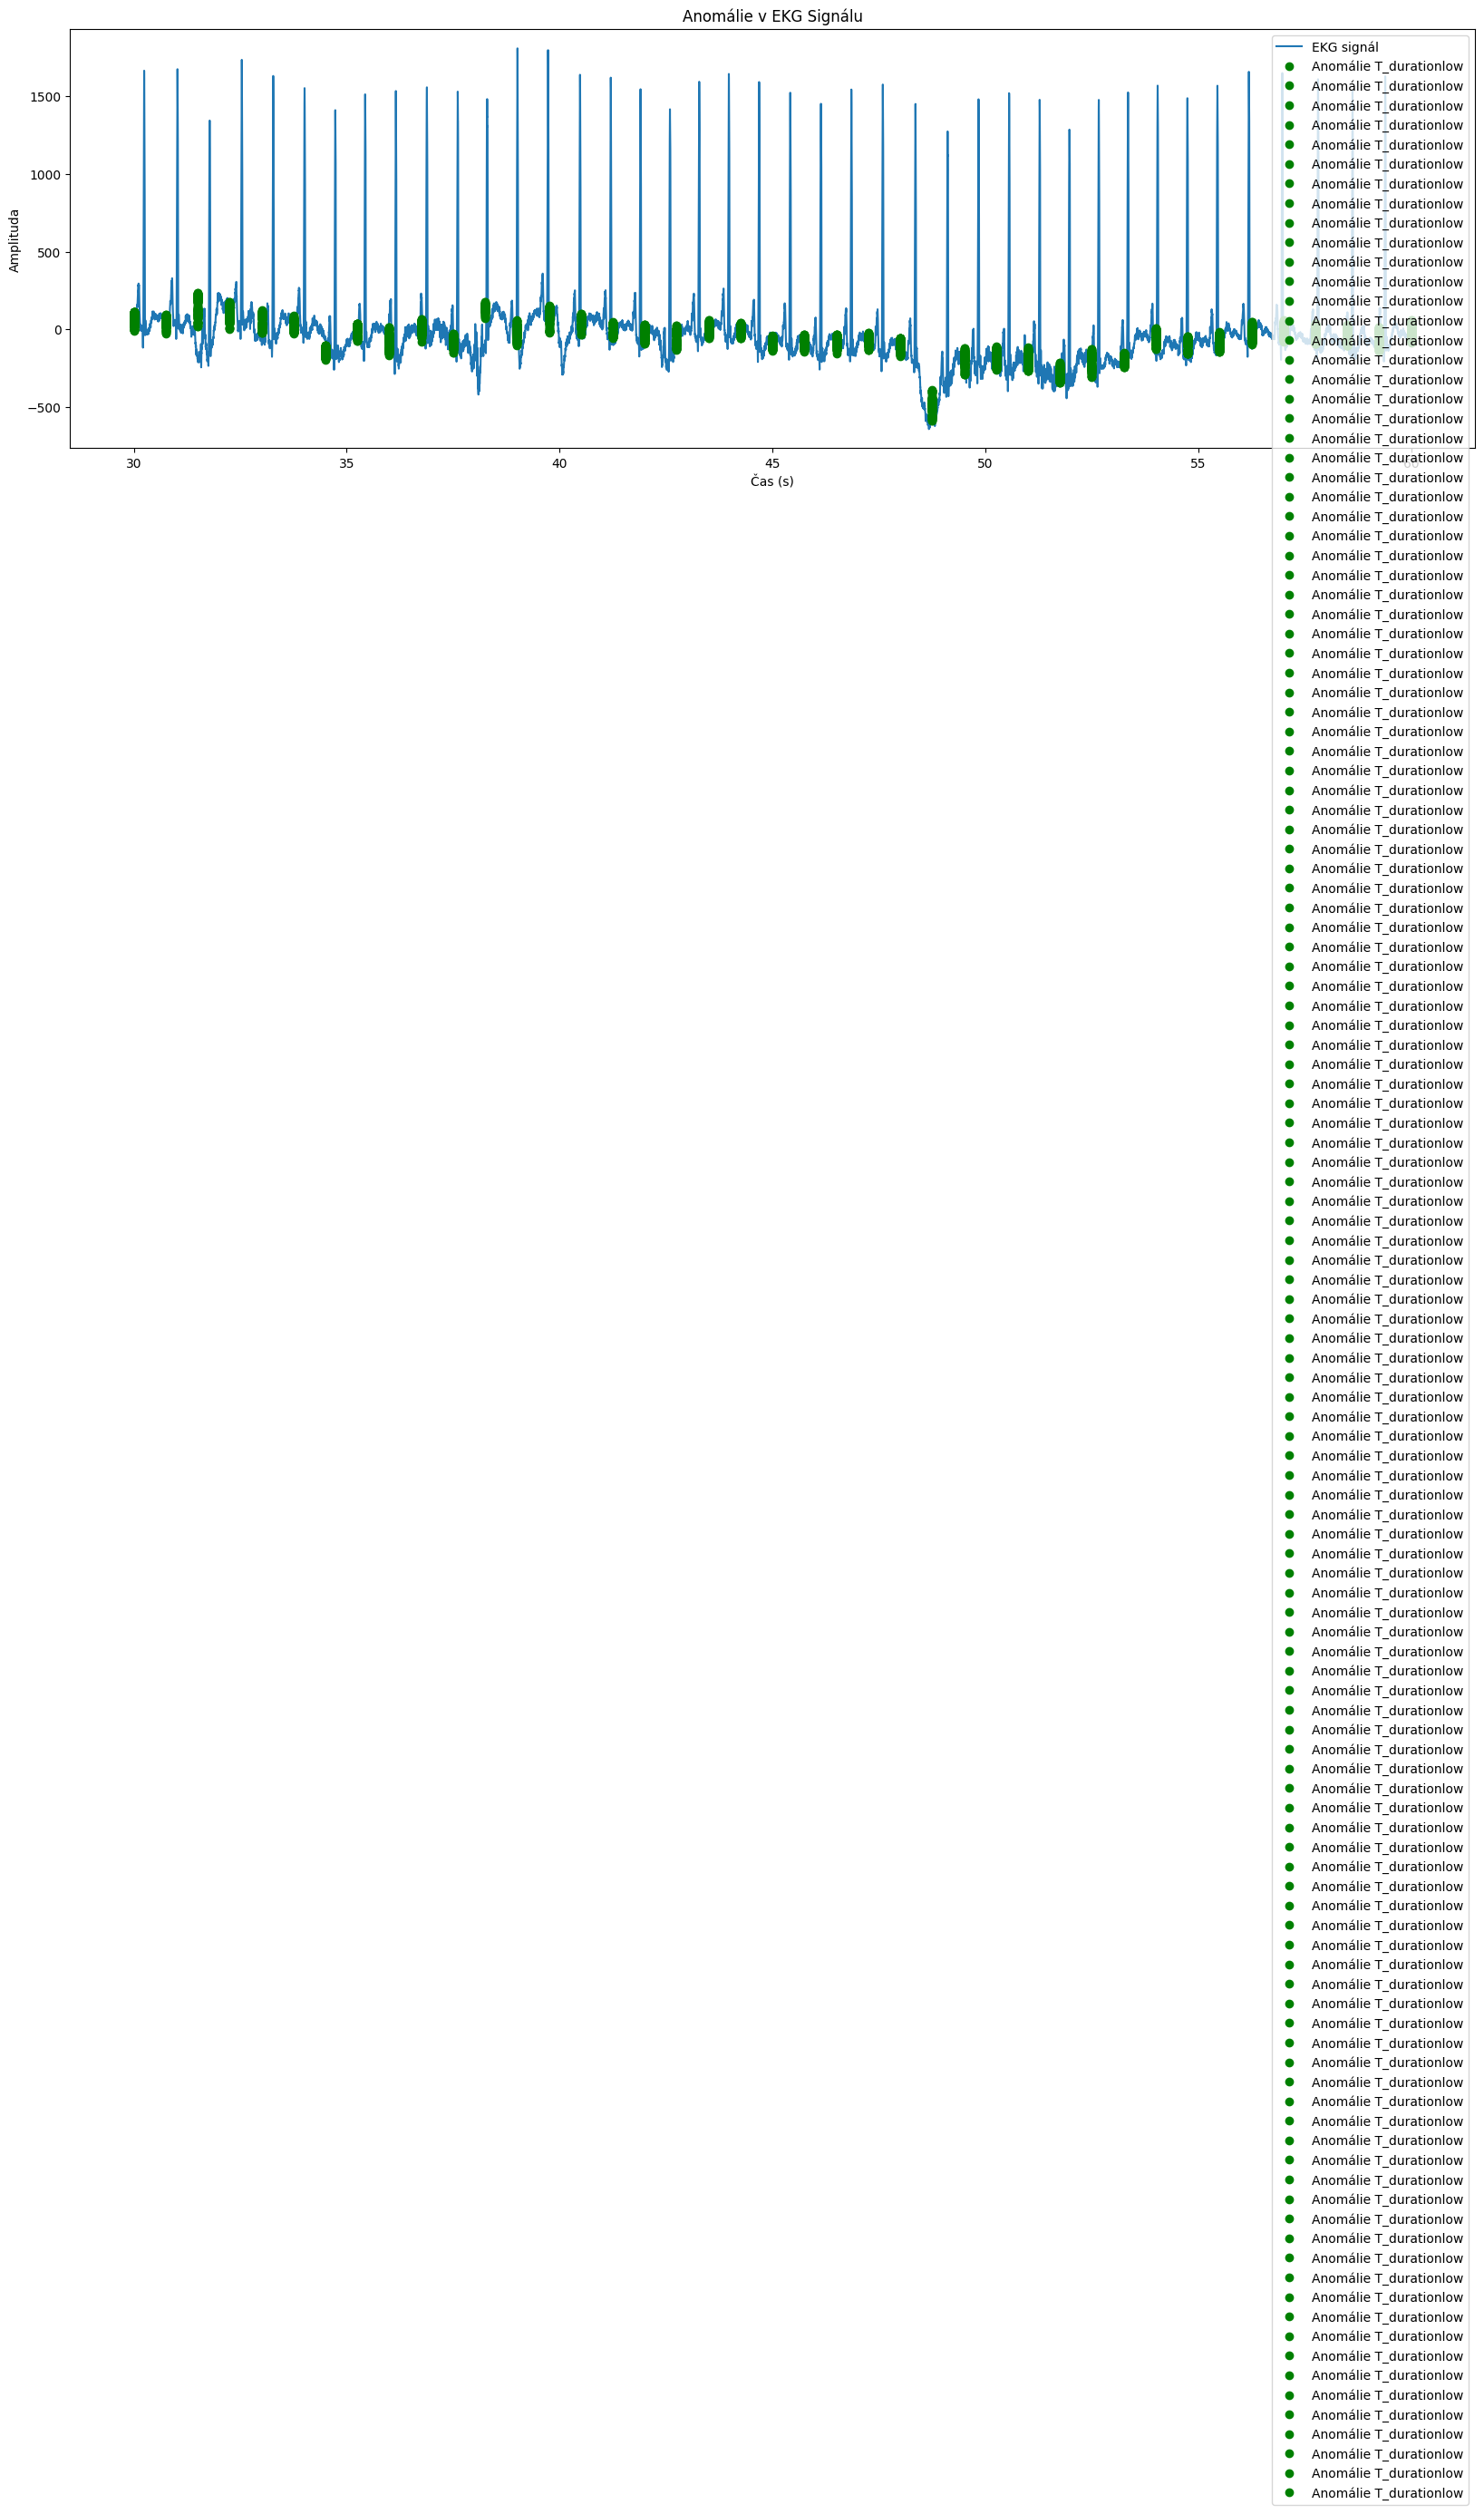

Vysoké amplitudy R vrcholů:  0 
 Nízké amplitudy R vrcholů:  0 
 P amplitudy nízké:  0 
 P amplitudy vysoké:  0 
 P duration nízký:  0 
 P duration vysoký:  0 
 T amplitudy nízké:  0 
 T amplitudy vysoké:  0 
 T duration nízké:  1 
 T duration vysoké:  0 
 QRS amplitude nízké:  0 
 QRS amplitude vysoké:  0 
 QRS duration nízké:  0 
 QRS duration vysoké:  0


In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

#detekce anomálií v signálu - způsob jak detekovat tyto úseky + prezentace statistiky výskytu úseků v měřeních
def Nacti_soubor(cesta_k_souboru): return wfdb.rdrecord(cesta_k_souboru)

ecg_mereni = Nacti_soubor(r"C:\Users\imang\OneDrive\Plocha\PZS\seminarni_prace_1\mereni_signalu\100001\100001_ECG")

ecg_signal = ecg_mereni.p_signal 
vz_f = ecg_mereni.__dict__['fs']
amplitudy = ecg_signal[:, 0]
start_time = 30
end_time = 60
start_index = int(vz_f*start_time) #vezmu si 30 sekund
end_index = int(vz_f*end_time)
ecg_signal_30_60 = amplitudy[start_index:end_index]
time_axis_30_60 = np.linspace(start_time,end_time,len(ecg_signal_30_60)) #na začátku vidím nějakou anomálii, tak si signál přesunu o 30 sekund dopředu
#zase si vložím R-peaks finder
def r_peaks_finder(ecg_signal, min_peaks_height, min_distance,test=False):
    r_peaks = [] #seznam, kam si uložím souřadnice vrcholů
    for i in range(1, len(ecg_signal)-1):
        #if ekg_signal[i] > threshold and ekg_signal[i] > ekg_signal[i - 1] and ekg_signal[i] > ekg_signal[i + 1]: peaks.append(i)
        if ecg_signal[i]>min_peaks_height:
            #zkontroluji že hodnota je větší něž okolní hodnoty
            #zde jsem ještě musel přidat podmínku aby to ty vrcholi kontrolovalo o 1 navíc citlivěji, protože mi některé to vynechalo
            if ecg_signal[i]>ecg_signal[i-1] and ecg_signal[i]>ecg_signal[i+1] or ecg_signal[i]>ecg_signal[i-1] and ecg_signal[i]>ecg_signal[i+2]:
                if len(r_peaks) == 0 or (i-r_peaks[-1]>=min_distance): 
                    r_peaks.append(i)
                elif test: print(f"Vrchol ignorován (příliš blízko): Index {i}, Hodnota {ecg_signal[i]}")
            elif test: print(f"Vrchol ignorován (není lokální maximum): Index {i}, Hodnota {ecg_signal[i]}")
    #print(r_peaks[:20]) #testování
    return r_peaks

def Vypocet_prumerne_frekvence(amplitudy, dolni_mez):
    x_coords = [uV for uV in amplitudy if uV > dolni_mez] #vezmu všechny hodnoty frekvencí, které jsou delší než dolní mez frekvence
    if len(x_coords) > 0: #když měření bude obsahovat nějaké souřadnice
        prumer_x = sum(x_coords) / len(x_coords) #vypočítám si průměrnou hodnotu x vrcholů
        return prumer_x
    else: return 0

#a ted nějaký algoritmus na detekci anomálií, kam bude vstupovat ekg signál, r vrcholy a nějaké limity které se vymykají normě
def detect_anomalies_algoritm(ecg_signal,r_peaks,fs,r_peaks_max,r_peaks_min, min_P, max_P, min_T, max_T, min_QRS, max_QRS):
    # nejdřív bychom si měli určit, které anomálie můžou nastávat při ekg měření
    anomalie = {'high_amplitudes': [], 'low_amplitudes': [], "P_amplow": [], "P_amphigh": [], "P_durationlow": [],"P_durationhigh": [], 
                                                            "T_amplow": [], "T_amphigh": [], "T_durationlow": [],"T_durationhigh": [], 
                                                            "QRS_amplow": [],"QRS_amphigh": [], "QRS_durationlow": [],"QRS_durationhigh": []}
    
    # Analýza amplitud R vrcholů
    for i,amp in enumerate(r_peaks):
        if ecg_signal[amp] > r_peaks_max: anomalie["high_amplitudes"].append((amp,ecg_signal[amp]))
        elif ecg_signal[amp] < r_peaks_min: anomalie["low_amplitudes"].append((amp,ecg_signal[amp]))

    #detekce anomálií ve vlnách
    vlny = { "P": [], "QRS": [], "T": []} #udělám si seznam, kam budu ukládat hodnoty naměřených typů vln
    #rozpoznání typů vln podle R vrcholů 
    for r in r_peaks: 
        #P vlna se nachází před r vrcholem nebo ještě Q kmitem, proto budeme odchytávat vlnu za R vrcholem
        p_start = r - int(0.2 * fs)  # P vlna začátek
        p_end = r - int(0.1 * fs)  # P vlna konec
        vlny["P"].append(ecg_signal[p_start:p_end])

        #zde detekuti QRS komplex, který se nachází od začátku Q negativního kmitu, přes R až po konec S negativního kmitu
        qrs_start = r - int(0.05 * fs)
        qrs_end = r + int(0.05 * fs)
        vlny["QRS"].append(ecg_signal[qrs_start:qrs_end])
        
        #T vlna se nachází za S negativním kmitem, který se nachází za R vrcholem
        t_start = r + int(0.1 * fs)  # T vlna začátek
        t_end =  r + int(0.2 * fs)  # T vlna konec
        vlny["T"].append(ecg_signal[t_start:t_end])
    #nejprve si vytvořím seznamy, kam budu ukládat vlny    
    amplitude_limits = {"P": [min_P, max_P],"QRS": [min_QRS, max_QRS],"T": [min_T, max_T]}
    #seznam pro limity délek vln v rozmezí ms
    duration_limits = {"P": [0.06*fs, 0.11*fs], "QRS": [0.08*fs, 0.12*fs],"T": [0.1*fs, 0.2*fs]} #rozmezí ms
    # projdu seznam s detekovanými vlnami v signálu 
    for wave_type, wave_interval in vlny.items():
            #projdu si amplitudy
            for amplitude in wave_interval:
                # vysoká amplituda
                if any(amplitude) > amplitude_limits[wave_type][1]: 
                    anomalie[wave_type+"_amphigh"].append((amplitude,ecg_signal[amplitude]))
                #nízká amlituda
                elif any(amplitude) < amplitude_limits[wave_type][0]:
                    anomalie[wave_type+"_amplow"].append((amplitude,ecg_signal[amplitude]))
                # Délka trvání intervalu
            duration = len(wave_interval)
            if duration:
                if duration < duration_limits[wave_type][0]:
                    print(wave_interval)
                    anomalie[wave_type+"_durationlow"].append((wave_interval,wave_interval[0])) #sem vstupuje již část EKG signálu
                #dlouhá délka trvání
                elif duration > duration_limits[wave_type][1]:
                    print(wave_interval)
                    anomalie[wave_type+"_durationhigh"].append((wave_interval,wave_interval[0]))
    
    return anomalie

# Vykreslení anomálií
def plot_anomalies(time_axis_30_60, ecg_signal_30_60, anomalie):
    plt.figure(figsize=(20, 6))
    plt.plot(time_axis_30_60,ecg_signal_30_60, label="EKG signál")
    for wave_type, anomaly_types in anomalie.items():
        if wave_type.find("amp") != -1:
            for idx in anomaly_types: 
                if wave_type == "P_amplow" or wave_type == "P_amphigh": color='red'
                elif wave_type == "T_amplow" or wave_type == "T_amphigh": color='green'
                elif wave_type == "QRS_amplow" or wave_type == "QRS_amphigh": color='blue'
                else: color="darkgreen"
                plt.plot(time_axis_30_60[idx[0]], ecg_signal_30_60[idx[0]], linestyle='None', marker='o', color=color, label=f"Anomálie {wave_type}")
        if wave_type.find("duration") != -1:
            for idx in anomaly_types:
                print("duration anomaly found")
                if wave_type == "P_durationlow" or wave_type == "P_durationhigh": color='red'
                elif wave_type == "T_durationlow" or wave_type == "T_durationhigh": color='green'
                elif wave_type == "QRS_durationlow" or wave_type == "QRS_durationhigh": color='blue'
                else: color="darkgreen"
                plt.plot(np.linspace(start_time,end_time,len(idx[0])), idx[0], linestyle='None', marker='o', color=color, label=f"Anomálie {wave_type}")
    plt.legend()
    plt.title("Anomálie v EKG Signálu")
    plt.xlabel("Čas (s)")
    plt.ylabel("Amplituda")
    plt.show()

dolni_mez = 500 
prumer_f = Vypocet_prumerne_frekvence(ecg_signal_30_60, dolni_mez)
min_peaks_height = prumer_f 
catching_time = 0.5
min_distance = int(vz_f*catching_time) 

r_peaks_30_60 = r_peaks_finder(ecg_signal_30_60, min_peaks_height, min_distance)

anomalie = detect_anomalies_algoritm(ecg_signal_30_60,r_peaks_30_60,vz_f*0.5,r_peaks_max=2500,r_peaks_min=prumer_f+70,min_P=-500,max_P=500,min_T=-500,max_T=500,min_QRS=-2000,max_QRS=2000)
#testování
def print_info(anomalie):
    print('Vysoké amplitudy R vrcholů: ',len(anomalie['high_amplitudes']),"\n",'Nízké amplitudy R vrcholů: ',len(anomalie["low_amplitudes"]),"\n",
          'P amplitudy nízké: ',len(anomalie["P_amplow"]),"\n", 'P amplitudy vysoké: ',len(anomalie["P_amphigh"]),"\n", 'P duration nízký: ',len(anomalie["P_durationlow"]),"\n", 'P duration vysoký: ',len(anomalie["P_durationhigh"]),"\n",
          'T amplitudy nízké: ',len(anomalie["T_amplow"]),"\n", 'T amplitudy vysoké: ',len(anomalie["T_amphigh"]),"\n", 'T duration nízké: ',len(anomalie["T_durationlow"]),"\n", 'T duration vysoké: ',len(anomalie["T_durationhigh"]),"\n",
          'QRS amplitude nízké: ',len(anomalie["QRS_amplow"]),"\n", 'QRS amplitude vysoké: ',len(anomalie["QRS_amphigh"]),"\n", 'QRS duration nízké: ',len(anomalie["QRS_durationlow"]),"\n", 'QRS duration vysoké: ',len(anomalie["QRS_durationhigh"]))

plot_anomalies(time_axis_30_60,ecg_signal_30_60,anomalie)


#vyzkouším to u jiného ekg měření
ecg_mereni = Nacti_soubor(r"C:\Users\imang\OneDrive\Plocha\PZS\seminarni_prace_1\mereni_signalu\100002\100002_ECG")

ecg_signal = ecg_mereni.p_signal 
vz_f = ecg_mereni.__dict__['fs']
amplitudy = ecg_signal[:, 0]

start_time = 30
end_time = 60
start_index = int(vz_f*start_time) #vezmu si 30 sekund
end_index = int(vz_f*end_time)
ecg_signal_30_60 = amplitudy[start_index:end_index]
time_axis_30_60 = np.linspace(start_time,end_time,len(ecg_signal_30_60)) #na začátku vidím nějakou anomálii, tak si signál přesunu o 30 sekund dopředu
dolni_mez = 500 
prumer_f = Vypocet_prumerne_frekvence(ecg_signal_30_60, dolni_mez)
min_peaks_height = prumer_f 
catching_time = 0.5
min_distance = int(vz_f*catching_time) 
r_peaks_30_60 = r_peaks_finder(ecg_signal_30_60, min_peaks_height, min_distance)

anomalie = detect_anomalies_algoritm(ecg_signal_30_60,r_peaks_30_60,vz_f*0.5,r_peaks_max=prumer_f+1500,r_peaks_min=prumer_f+70,min_P=-500,max_P=500,min_T=-1000,max_T=500,min_QRS=-2000,max_QRS=2000)
plot_anomalies(time_axis_30_60,ecg_signal_30_60,anomalie) #zde jsem žádné anomálie nenašel
print_info(anomalie)
